In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root="/content/drive/MyDrive/Rishabh 2023uai1803"

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from PIL import Image
import os
import cv2

In [ ]:
def resize_with_padding(image, target_size=(256, 256)):
    if isinstance(image, Image.Image):
        image = np.array(image)

    height, width = image.shape[:2]
    target_height, target_width = target_size

    # Calculate padding
    pad_y = max(target_height - height, 0)
    pad_x = max(target_width - width, 0)

    # Apply padding
    top_pad = pad_y // 2
    bottom_pad = pad_y - top_pad
    left_pad = pad_x // 2
    right_pad = pad_x - left_pad

    # Pad the image
    padded_image = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Resize to target size
    resized_image = cv2.resize(padded_image, target_size)

    return resized_image


In [ ]:
def load_image_to_array(image_path):
    """Load an image file into a numpy array and return dimensions."""
    with Image.open(image_path) as img:
        img = img.convert('RGB')  # Ensure image is in RGB format
        img_array = np.array(img)  # Convert to numpy array
        img_array = resize_with_padding(img_array)  # Resize image to a consistent size
        return img_array, img_array.shape

In [ ]:
def load_images(paths, labels):
    """Load images from given paths and associate them with the given labels."""
    image_arrays = []
    for path in paths:
        img_array, _ = load_image_to_array(path)
        image_arrays.append(img_array)
    return np.array(image_arrays), labels

In [ ]:
def load_images_from_folder(root):
    """
    Load all images from a folder into a 4D numpy array along with their labels.

    Args:
    root (str): The path to the folder containing subfolders of images for each label.

    Returns:
    np.array: 4D numpy array of all images.
    np.array: Array of corresponding labels.
    """
    labels = []
    image_arrays = []

    for label in os.listdir(root):
        folder_path = os.path.join(root, label)
        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            img_array, _ = load_image_to_array(image_path)
            image_arrays.append(img_array)
            labels.append(label)

    return np.array(image_arrays), np.array(labels)

In [ ]:
root_path = root
images, labels = load_images_from_folder(root_path)

In [ ]:
# Display the dimesnions of the data
print(images.shape)
print(labels.shape)


(2306, 256, 256, 3)
(2306,)


y = open large


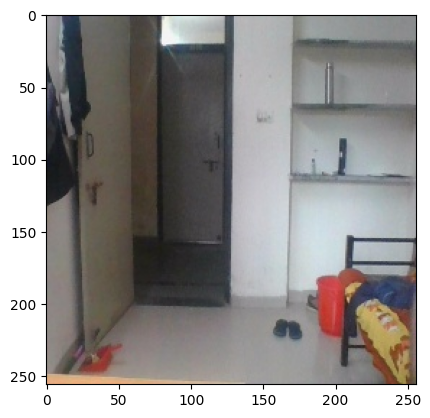

In [ ]:
# exampl image
index=590
plt.imshow(images[index])
print ("y = " + labels[index])

In [ ]:
X=np.array(images,dtype=np.float32);
X=X/255.0 #normalise the pixels


In [ ]:
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(labels)
Y


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Combine X and Y into a single array for shuffling
combined = list(zip(X, Y))

# Shuffle the combined array
np.random.shuffle(combined)

# Unzip the shuffled array back into X and Y
X_shuffled, Y_shuffled = zip(*combined)

# Convert back to numpy arrays
X_shuffled = np.array(X_shuffled)
Y_shuffled = np.array(Y_shuffled)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=42)
Y_trainOHE = to_categorical(Y_train, num_classes=2)
Y_testOHE = to_categorical(Y_test, num_classes=2)
print(X_train.shape)
print(Y_trainOHE.shape)
print(X_test.shape)
print(Y_testOHE.shape)

(1844, 256, 256, 3)
(1844, 2)
(462, 256, 256, 3)
(462, 2)


In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256 , 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

# Train the model and capture the history object
history = model.fit(
    X_train, Y_trainOHE,
    epochs=50,
    validation_split=0.2,
     batch_size=32
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 604ms/step - accuracy: 0.5252 - loss: 1.4637 - val_accuracy: 0.5745 - val_loss: 0.6885
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - accuracy: 0.5896 - loss: 0.6875 - val_accuracy: 0.5745 - val_loss: 0.6732
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.5953 - loss: 0.6616 - val_accuracy: 0.7995 - val_loss: 0.5360
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.7899 - loss: 0.5147 - val_accuracy: 0.8916 - val_loss: 0.2441
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.8964 - loss: 0.2521 - val_accuracy: 0.9133 - val_loss: 0.3365
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9377 - loss: 0.1904 - val_accuracy: 0.9458 - val_loss: 0.1534
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9449 - loss: 0.1532 - val_accuracy: 0.9621 - val_loss: 0.1126
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.9727 - loss: 0.0720 - val_accuracy

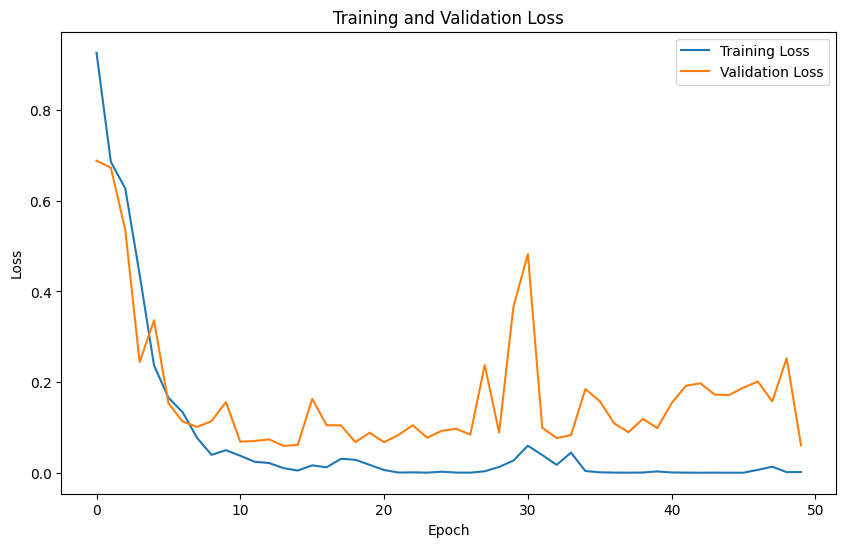

In [ ]:

# Plot the cost function (loss) as epochs progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

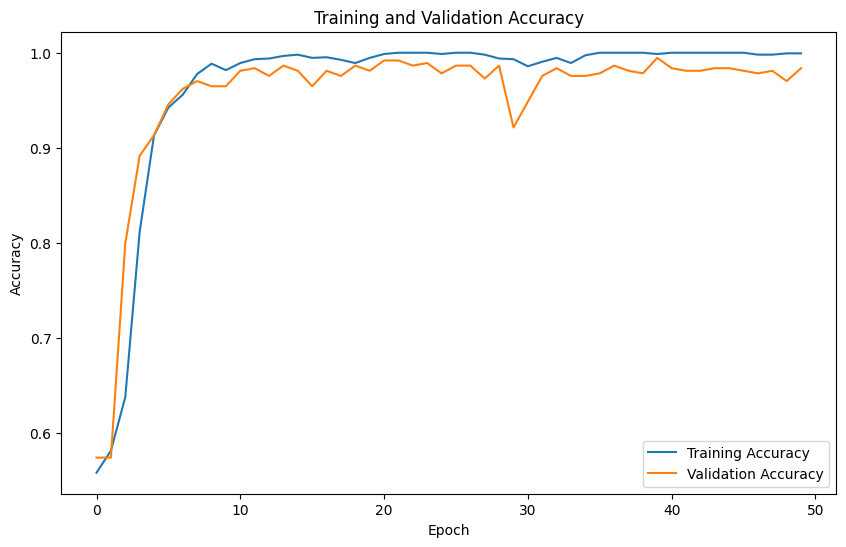

In [ ]:
# Plot the accuracy as epochs progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step


array([[1.48869471e-15, 1.00000000e+00],
       [4.36146507e-13, 1.00000000e+00],
       [9.99999642e-01, 6.79244678e-08],
       [2.77900816e-16, 1.00000000e+00],
       [9.88792598e-01, 1.46752130e-02],
       [1.10942782e-21, 1.00000000e+00],
       [1.31189842e-18, 1.00000000e+00],
       [3.47808718e-12, 1.00000000e+00],
       [1.00000000e+00, 1.28857914e-11],
       [6.53014806e-13, 1.00000000e+00],
       [7.91605583e-12, 1.00000000e+00],
       [4.47420367e-09, 1.00000000e+00],
       [3.70596609e-07, 9.99994755e-01],
       [1.10146484e-16, 1.00000000e+00],
       [1.10271316e-13, 1.00000000e+00],
       [9.99896884e-01, 1.25143561e-04],
       [3.12608855e-10, 1.00000000e+00],
       [3.76230964e-05, 9.99852777e-01],
       [2.47119794e-19, 1.00000000e+00],
       [1.22279047e-19, 1.00000000e+00],
       [1.40535014e-11, 1.00000000e+00],
       [3.85053535e-17, 1.00000000e+00],
       [9.99928594e-01, 5.88850526e-05],
       [3.51740609e-13, 1.00000000e+00],
       [5.403319

In [ ]:
Y_pred = tf.nn.softmax(Y_pred).numpy()
predicted_labels = np.argmax(Y_pred, axis=1)
# Convert Y_test to integer labels
# Y_test = np.argmax(Y_test)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)


0.9913419913419913


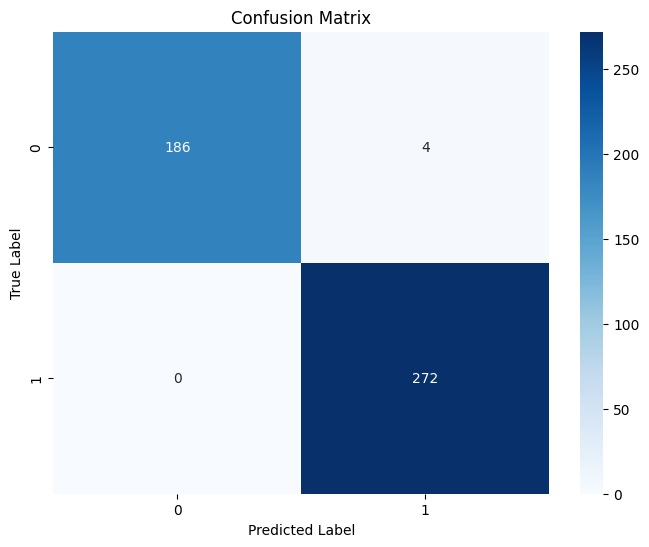

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(Y_test, predicted_labels, classes=np.unique(Y_test))

In [ ]:
def plot_wrong_classifications(X_test, y_true, y_pred, classes, image_size=4):
    # Find indices where predictions were incorrect
    incorrect_indices = np.where(y_true != y_pred)[0]

    # Plot all incorrect classifications
    num_plots = len(incorrect_indices)
    num_rows = (num_plots // 5) + (1 if num_plots % 5 != 0 else 0)
    fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

    for i, idx in enumerate(incorrect_indices):
        ax = axes[i // 5, i % 5] if num_plots > 5 else axes[i]
        ax.imshow(X_test[idx].reshape(256, 256,3), cmap='gray', interpolation='nearest')
        ax.set_title(f'Predicted: {classes[y_pred[idx]]}\nTrue: {classes[y_true[idx]]}')
        ax.axis('off')
        ax.set_aspect('equal')  # Ensure the aspect ratio is equal

    plt.tight_layout()
    plt.show()

In [ ]:
plot_wrong_classifications(X_test, Y_test, predicted_labels, classes=np.unique(Y_test))

In [ ]:
# Save the entire model
model.save(root+'my_model.h5')


KeyboardInterrupt: 